
# PROJETO 1

### Pergunta: Existe relacao entre a producao de eletricidade por pessoa ou a energia total usadae o IDH de um pais?
aluno: Bruno Kaczelnik


In [35]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt


In [55]:
elctricity = pd.read_excel('Electricity Generation per capita.xls.xlsx')
HDI=pd.read_excel('Indicator_HDI.xlsx')
internet_users=pd.read_excel('internet user per 100.xlsx')

In [91]:
internet_users.head(275)


,Internet users (per 100 people),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004092,0.079875,0.097164,1.130398,1.947423,1.751202,1.688485,3.246306,3.654114,4.580670
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,0.000000,NaN,NaN,NaN,NaN,0.011169,0.032197,0.048594,0.065027,...,0.390081,0.971900,2.420388,6.043891,9.609991,15.036115,23.860000,41.200000,45.000000,49.000000
4,Algeria,0.000000,NaN,NaN,NaN,0.000361,0.001769,0.001739,0.010268,0.020239,...,1.591641,2.195360,4.634475,5.843942,7.375985,9.451191,10.180000,11.230000,12.500000,14.000000
5,American Samoa,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Andorra,0.000000,NaN,NaN,NaN,NaN,NaN,1.526601,3.050175,6.886209,...,11.260469,13.546413,26.837954,37.605766,48.936847,70.870000,70.040000,78.530000,81.000000,81.000000
7,Angola,0.000000,NaN,NaN,NaN,NaN,NaN,0.000776,0.005674,0.018454,...,0.270377,0.370682,0.464815,1.143367,1.907648,3.200000,4.600000,6.000000,10.000000,14.776000
8,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,0.000000,NaN,NaN,NaN,NaN,2.200769,2.858450,3.480537,4.071716,...,12.500000,17.228649,24.266544,34.716403,62.638869,70.060000,75.030000,74.200000,80.000000,82.000000


In [96]:
HDI.head(270)

,HDI,1980,1990,2000,2005,2006,2007,2008,2009,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,0.198,0.246,0.230,0.340,0.354,0.363,0.370,0.387,0.398
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,0.656,0.691,0.721,0.724,0.729,0.733,0.734,0.739
4,Algeria,0.454,0.551,0.624,0.667,0.673,0.680,0.686,0.691,0.698
5,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.838
7,Angola,NaN,NaN,0.384,0.445,0.459,0.471,0.476,0.481,0.486
8,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.764


In [98]:
HDI.head(270)

,HDI,1980,1990,2000,2005,2006,2007,2008,2009,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,0.198,0.246,0.230,0.340,0.354,0.363,0.370,0.387,0.398
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,0.656,0.691,0.721,0.724,0.729,0.733,0.734,0.739
4,Algeria,0.454,0.551,0.624,0.667,0.673,0.680,0.686,0.691,0.698
5,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.838
7,Angola,NaN,NaN,0.384,0.445,0.459,0.471,0.476,0.481,0.486
8,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.764


In [99]:
elctricity_2008 = elctricity.loc[:, ["Electricity generation per person (kilowatt-hours)", 2008]]
#internet_users_2008 = internet_users.loc[:, ['Internet users (per 100 people)', 2018]]
HDI_2008 = HDI.loc[:, ["HDI", 2008]]


In [100]:
elctricity_2008_idx=elctricity_2008.set_index('Electricity generation per person (kilowatt-hours)')
#internet_users_2008_idx=internet_users_2008.set_index('Internet users (per 100 people)')
HDI_2008_idx= HDI_2008.set_index('HDI')

In [7]:
elctricity_2008_idx.head()

,2008
Electricity generation per person (kilowatt-hours),
Algeria,1185.163977
Argentina,3074.364632
Australia,13216.047916
Austria,8262.229888
Azerbaijan,2679.228220


In [8]:
HDI_2008_idx.head()

,2008
HDI,
Abkhazia,NaN
Afghanistan,0.370
Akrotiri and Dhekelia,NaN
Albania,0.733
Algeria,0.686


In [102]:
data = elctricity_2008_idx.join(HDI_2008_idx, how='inner', lsuffix='_electricity', rsuffix='_HDI')
df = data.dropna()
df.head(20)

,2008_electricity,2008_HDI
Algeria,1185.163977,0.686
Argentina,3074.364632,0.786
Australia,13216.047916,0.924
Austria,8262.229888,0.876
Bangladesh,179.078834,0.484
Belarus,3393.482961,0.744
Brazil,2368.314941,0.705
Bulgaria,6194.411839,0.765
Canada,17783.287004,0.903
Chile,3684.832241,0.796


In [108]:
df.to_csv( 'electricity_HDI.csv', index=True)

In [109]:
#df["2008_HDI"].plot.hist(density=True);

In [110]:
#df["2008_HDI"].plot.box();

In [120]:
#df["2008_HDI_ordinal"] = pd.cut(data["2008_HDI"], bins=10)

In [118]:
df["2008_HDI_ordinal"]

Algeria                 (0.667, 0.712]
Argentina               (0.758, 0.804]
Australia               (0.895, 0.941]
Austria                  (0.85, 0.895]
Bangladesh               (0.484, 0.53]
Belarus                 (0.712, 0.758]
Brazil                  (0.667, 0.712]
Bulgaria                (0.758, 0.804]
Canada                  (0.895, 0.941]
Chile                   (0.758, 0.804]
China                   (0.621, 0.667]
Colombia                (0.667, 0.712]
Denmark                  (0.85, 0.895]
Ecuador                 (0.712, 0.758]
Egypt                   (0.621, 0.667]
Finland                  (0.85, 0.895]
France                   (0.85, 0.895]
Germany                 (0.895, 0.941]
Greece                   (0.85, 0.895]
Hong Kong, China         (0.85, 0.895]
Hungary                  (0.804, 0.85]
Iceland                  (0.85, 0.895]
India                    (0.484, 0.53]
Indonesia               (0.575, 0.621]
Iran                    (0.667, 0.712]
Ireland                 (

In [94]:
faixas = df["2008_HDI_ordinal"].value_counts(sort=False)
faixas

(0.484, 0.53]      3
(0.53, 0.575]      0
(0.575, 0.621]     2
(0.621, 0.667]     4
(0.667, 0.712]     8
(0.712, 0.758]     8
(0.758, 0.804]     7
(0.804, 0.85]      6
(0.85, 0.895]     12
(0.895, 0.941]    10
Name: 2008_HDI_ordinal, dtype: int64

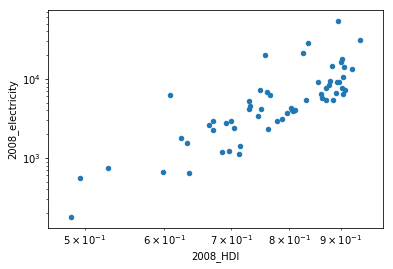

In [112]:
df.plot.scatter(x="2008_HDI", y = "2008_electricity", loglog=True)


podemos perceber, principalmente neste ultimo grafico, que relaciona 
o IDH com a producao de eletricidade por pessoa , que quanto maior o 
IDH de um pais, maior a produtividade eletrica, assim aparentado ser uma 
relacao de causa e consequencia


In [115]:

print(df['2008_electricity'].corr(df['2008_HDI']))


0.5203146118949057



Quando olhamos a correlacao de 0.5203146118949057 podemos perceber que este valor nao esta tao proximo de 1 como se esperava,
mesmo que se aproxime mais de 1 que de 0. Para a situacao analisada esta correlacao pode ser considerada , nao boa , mas aceitavel.